In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# install
## numpy
## matplotlib

### data load & preprocessing

In [2]:
from dataset.mnist import load_mnist

(train_raw_img, train_label), (test_raw_img, test_label) = load_mnist(flatten=False, normalize=False)
print(train_raw_img.shape)
print(train_label.shape)

(60000, 1, 28, 28)
(60000,)


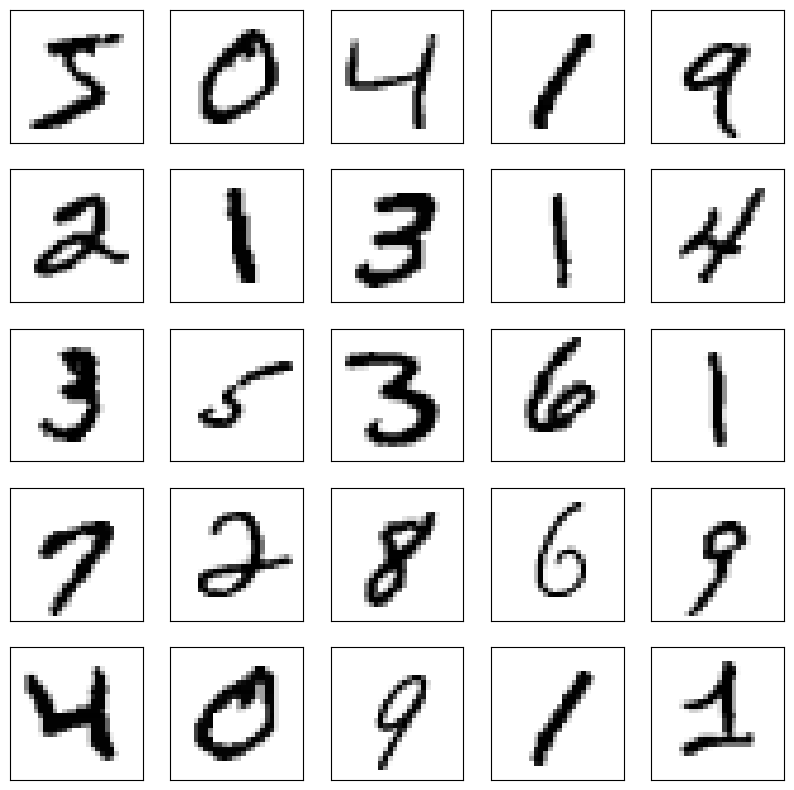

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_raw_img[i][0], cmap=plt.cm.binary)
plt.show()

In [4]:
np.unique(train_label, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [5]:
# train_dataset split according to the number

new_train_img = [[] for _ in range(10)]
new_train_label = [[] for _ in range(10)]

for i in range(len(train_label)) :
    new_train_img[train_label[i]].append(train_raw_img[i])
    new_train_label[train_label[i]].append(train_label[i])

# print(len(new_train_img[0])) # 0에 해당하는 image 개수
# print(new_train_img[0][0].shape) # 0에 해당하는 image중 첫번째 image의 shape

### 1. Create a classifier that distinguishes between zero and non-zero (using logistic regression)

In [6]:
def make_sample(idx) :
    sample_img = []
    sample_label = []
    
    # data sampling 
    for i in range(10) :
        if i == idx :
            sample_img += new_train_img[i][:1000]
            sample_label += (new_train_label[i][:1000])
        else :
            sample_img += new_train_img[i][:111]
            sample_label += (new_train_label[i][:111])

    sample_img = np.array(sample_img)
    sample_label = np.array(sample_label)
    
    # normalization (set value 0 ~ 1)
    sample_img = sample_img.astype('float')/255
    
    # target number는 1, 아니면 0
    sample_label = np.where(sample_label==idx, 1 ,0)
    
    # reshape
    sample_img = sample_img.reshape(len(sample_img.squeeze()), -1)
    sample_label = sample_label.reshape(len(sample_label.squeeze()), -1)
    
    return sample_img, sample_label

In [7]:
train_X, train_y = make_sample(idx = 0) # idx = target number
train_X = np.insert(train_X, 0, 1, axis=1) # bias 추가

# print(train_y.shape)

In [13]:
# cross entropy loss
def CrossEntropyLoss(w, X, y) :
    delta = 1e-7
    
    preds = 1 / (1+np.exp(-X.dot(w)))
    loss = np.sum(-y*np.log(preds+delta)-(1-y)*np.log(1-preds+delta))/len(preds)
        
    return loss , preds

In [14]:
# eval (accuracy)

def eval(idx, w) :
    """_summary_

    Args:
        idx : target_number
        w : parameter
    """
    test_X = test_raw_img.astype('float')/255    
    test_X = test_X.reshape(len(test_X.squeeze()), -1)
    test_X = np.insert(test_X, 0, 1, axis=1) # + bias

    test_y = np.where(test_label==idx, 1 ,0)
    test_y = test_y.reshape(len(test_y.squeeze()), -1)
    
    preds = 1/(1+np.exp(-test_X.dot(w)))
    result = np.where(preds>0.5, 1, 0)
    
    acc = np.sum(np.where(result==test_y, True, False))/len(preds)
    
    return acc
    # print('accuracy : ', acc)

In [15]:
# train

# (추가)change parameter to take a evaluation for each different digit. 

def train(X, y, index) :
    """_summary_

    Args:
        X : train_X
        y : train_y

    Returns:
        w : weight
        
    (추가)index : 
        (추가)index = to take evaluation for each digit 
        (추가)the range of it is 0 ~ 9
    """
    w = np.random.randn(len(X[0]), 1)
    lr = 0.1 # learning rate(수정 가능)
    step = 0
    acc = 0
    prev_loss = float('inf')
    J_history = list()
    ACC_history = list()
    
    while (acc <= 0.85) :
        step += 1
        correct = 0
        
        acc = eval(index, w)
        
        loss, preds = CrossEntropyLoss(w, X, y)
        
        diff = preds - y
        gradient = X.T.dot(diff) / X.shape[0]
        w -= lr * gradient
        
        if abs(loss - prev_loss) < 1e-4:
            break
        
        prev_loss = loss
        J_history.append(loss)
        ACC_history.append(acc)
        print("total step : %d " % step)
        print("error : %f, accuarcy : %f" % (loss, acc))
        
    return w, J_history, ACC_history

In [12]:
# save weight
w,J_history, ACC_history = train(train_X, train_y, 0)

total step : 1 
error : 3.563889, accuarcy : 0.250700
total step : 2 
error : 3.316959, accuarcy : 0.277700
total step : 3 
error : 3.086968, accuarcy : 0.304100
total step : 4 
error : 2.873176, accuarcy : 0.332600
total step : 5 
error : 2.674862, accuarcy : 0.359300
total step : 6 
error : 2.491320, accuarcy : 0.386600
total step : 7 
error : 2.321867, accuarcy : 0.414800
total step : 8 
error : 2.165850, accuarcy : 0.443300
total step : 9 
error : 2.022621, accuarcy : 0.468200
total step : 10 
error : 1.891493, accuarcy : 0.489800
total step : 11 
error : 1.771724, accuarcy : 0.512200
total step : 12 
error : 1.662534, accuarcy : 0.535600
total step : 13 
error : 1.563124, accuarcy : 0.553500
total step : 14 
error : 1.472699, accuarcy : 0.570000
total step : 15 
error : 1.390488, accuarcy : 0.588200
total step : 16 
error : 1.315759, accuarcy : 0.603500
total step : 17 
error : 1.247830, accuarcy : 0.616800
total step : 18 
error : 1.186065, accuarcy : 0.632600
total step : 19 
er

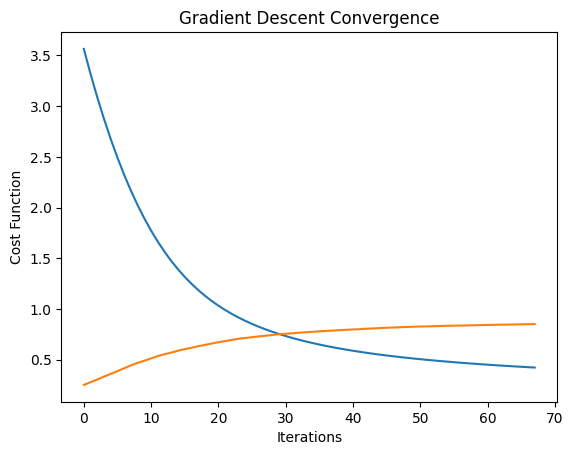

In [13]:
# Plot the cost function vs. iterations to check for convergence
plt.plot(J_history, label='Cost Function')
plt.plot(ACC_history, label='Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Gradient Descent Convergence')
plt.show()

### 2. multi class single label classification (using logistic regression)

In [14]:
train_0X, train_0y = make_sample(idx = 0) # idx = target number
train_0X = np.insert(train_0X, 0, 1, axis=1) # bias 추가
w0,J0_history, ACC0_history = train(train_X, train_y,0)


total step : 1 
error : 6.365101, accuarcy : 0.324700
total step : 2 
error : 5.709550, accuarcy : 0.298700
total step : 3 
error : 5.124185, accuarcy : 0.280700
total step : 4 
error : 4.638520, accuarcy : 0.272700
total step : 5 
error : 4.250882, accuarcy : 0.269900
total step : 6 
error : 3.939100, accuarcy : 0.271200
total step : 7 
error : 3.677872, accuarcy : 0.278200
total step : 8 
error : 3.449442, accuarcy : 0.288300
total step : 9 
error : 3.243240, accuarcy : 0.301200
total step : 10 
error : 3.053246, accuarcy : 0.314600
total step : 11 
error : 2.876193, accuarcy : 0.330700
total step : 12 
error : 2.710348, accuarcy : 0.347800
total step : 13 
error : 2.554761, accuarcy : 0.364600
total step : 14 
error : 2.408853, accuarcy : 0.383300
total step : 15 
error : 2.272215, accuarcy : 0.402600
total step : 16 
error : 2.144511, accuarcy : 0.419600
total step : 17 
error : 2.025417, accuarcy : 0.436700
total step : 18 
error : 1.914587, accuarcy : 0.455100
total step : 19 
er

In [15]:
train_1X, train_1y = make_sample(idx = 1) # idx = target number
train_1X = np.insert(train_1X, 0, 1, axis=1) # bias 추가
w1,J1_history, ACC1_history = train(train_1X, train_1y,1)

total step : 1 
error : 4.089703, accuarcy : 0.827500
total step : 2 
error : 3.466404, accuarcy : 0.810400
total step : 3 
error : 2.896703, accuarcy : 0.792500
total step : 4 
error : 2.414390, accuarcy : 0.774200
total step : 5 
error : 2.040623, accuarcy : 0.766800
total step : 6 
error : 1.770120, accuarcy : 0.761100
total step : 7 
error : 1.579804, accuarcy : 0.759100
total step : 8 
error : 1.443130, accuarcy : 0.758600
total step : 9 
error : 1.339689, accuarcy : 0.758200
total step : 10 
error : 1.256674, accuarcy : 0.760200
total step : 11 
error : 1.186723, accuarcy : 0.764400
total step : 12 
error : 1.125694, accuarcy : 0.767900
total step : 13 
error : 1.071225, accuarcy : 0.772600
total step : 14 
error : 1.021911, accuarcy : 0.777800
total step : 15 
error : 0.976870, accuarcy : 0.783800
total step : 16 
error : 0.935508, accuarcy : 0.790000
total step : 17 
error : 0.897394, accuarcy : 0.795000
total step : 18 
error : 0.862192, accuarcy : 0.800900
total step : 19 
er

In [16]:
train_2X, train_2y = make_sample(idx = 2) # idx = target number
train_2X = np.insert(train_2X, 0, 1, axis=1) # bias 추가
w2,J2_history, ACC2_history  = train(train_2X, train_2y,2)

total step : 1 
error : 2.819543, accuarcy : 0.388500
total step : 2 
error : 2.545350, accuarcy : 0.436700
total step : 3 
error : 2.335373, accuarcy : 0.478500
total step : 4 
error : 2.178272, accuarcy : 0.517100
total step : 5 
error : 2.061633, accuarcy : 0.543300
total step : 6 
error : 1.974090, accuarcy : 0.568500
total step : 7 
error : 1.906440, accuarcy : 0.588600
total step : 8 
error : 1.851876, accuarcy : 0.606700
total step : 9 
error : 1.805872, accuarcy : 0.620300
total step : 10 
error : 1.765580, accuarcy : 0.630000
total step : 11 
error : 1.729213, accuarcy : 0.640400
total step : 12 
error : 1.695641, accuarcy : 0.649700
total step : 13 
error : 1.664142, accuarcy : 0.657400
total step : 14 
error : 1.634250, accuarcy : 0.664600
total step : 15 
error : 1.605660, accuarcy : 0.669600
total step : 16 
error : 1.578173, accuarcy : 0.675900
total step : 17 
error : 1.551654, accuarcy : 0.681400
total step : 18 
error : 1.526010, accuarcy : 0.686100
total step : 19 
er

In [17]:
train_3X, train_3y = make_sample(idx = 3) # idx = target number
train_3X = np.insert(train_3X, 0, 1, axis=1) # bias 추가
w3,J3_history, ACC3_history = train(train_3X, train_3y,3)

total step : 1 
error : 3.687951, accuarcy : 0.466900
total step : 2 
error : 3.529909, accuarcy : 0.455100
total step : 3 
error : 3.389804, accuarcy : 0.448500
total step : 4 
error : 3.263298, accuarcy : 0.446700
total step : 5 
error : 3.147662, accuarcy : 0.446600
total step : 6 
error : 3.040900, accuarcy : 0.448000
total step : 7 
error : 2.941471, accuarcy : 0.450200
total step : 8 
error : 2.848236, accuarcy : 0.454100
total step : 9 
error : 2.760389, accuarcy : 0.457800
total step : 10 
error : 2.677365, accuarcy : 0.463400
total step : 11 
error : 2.598753, accuarcy : 0.467800
total step : 12 
error : 2.524230, accuarcy : 0.474000
total step : 13 
error : 2.453524, accuarcy : 0.479800
total step : 14 
error : 2.386391, accuarcy : 0.484600
total step : 15 
error : 2.322606, accuarcy : 0.490100
total step : 16 
error : 2.261956, accuarcy : 0.498100
total step : 17 
error : 2.204243, accuarcy : 0.504900
total step : 18 
error : 2.149278, accuarcy : 0.511500
total step : 19 
er

In [18]:
train_4X, train_4y = make_sample(idx = 4) # idx = target number
train_4X = np.insert(train_4X, 0, 1, axis=1) # bias 추가
w4,J4_history, ACC4_history = train(train_4X, train_4y,4)

total step : 1 
error : 2.407625, accuarcy : 0.655100
total step : 2 
error : 2.273792, accuarcy : 0.641000
total step : 3 
error : 2.171872, accuarcy : 0.632000
total step : 4 
error : 2.091235, accuarcy : 0.623100
total step : 5 
error : 2.024788, accuarcy : 0.616900
total step : 6 
error : 1.967945, accuarcy : 0.611300
total step : 7 
error : 1.917744, accuarcy : 0.607600
total step : 8 
error : 1.872270, accuarcy : 0.605900
total step : 9 
error : 1.830281, accuarcy : 0.605200
total step : 10 
error : 1.790968, accuarcy : 0.605700
total step : 11 
error : 1.753796, accuarcy : 0.606700
total step : 12 
error : 1.718411, accuarcy : 0.609300
total step : 13 
error : 1.684568, accuarcy : 0.610600
total step : 14 
error : 1.652097, accuarcy : 0.612300
total step : 15 
error : 1.620873, accuarcy : 0.615100
total step : 16 
error : 1.590803, accuarcy : 0.617600
total step : 17 
error : 1.561813, accuarcy : 0.620500
total step : 18 
error : 1.533843, accuarcy : 0.623100
total step : 19 
er

In [19]:
train_5X, train_5y = make_sample(idx = 5) # idx = target number
train_5X = np.insert(train_5X, 0, 1, axis=1) # bias 추가
w5,J5_history, ACC5_history = train(train_5X, train_5y,5)

total step : 1 
error : 2.327907, accuarcy : 0.729000
total step : 2 
error : 2.062304, accuarcy : 0.706400
total step : 3 
error : 1.877190, accuarcy : 0.684800
total step : 4 
error : 1.751052, accuarcy : 0.667400
total step : 5 
error : 1.665293, accuarcy : 0.654600
total step : 6 
error : 1.605845, accuarcy : 0.642300
total step : 7 
error : 1.563147, accuarcy : 0.633800
total step : 8 
error : 1.531035, accuarcy : 0.627000
total step : 9 
error : 1.505587, accuarcy : 0.622400
total step : 10 
error : 1.484337, accuarcy : 0.619200
total step : 11 
error : 1.465753, accuarcy : 0.617200
total step : 12 
error : 1.448902, accuarcy : 0.616900
total step : 13 
error : 1.433214, accuarcy : 0.616700
total step : 14 
error : 1.418345, accuarcy : 0.617600
total step : 15 
error : 1.404084, accuarcy : 0.617700
total step : 16 
error : 1.390302, accuarcy : 0.619000
total step : 17 
error : 1.376917, accuarcy : 0.621500
total step : 18 
error : 1.363877, accuarcy : 0.622900
total step : 19 
er

In [20]:
train_6X, train_6y = make_sample(idx = 6) # idx = target number
train_6X = np.insert(train_6X, 0, 1, axis=1) # bias 추가
w6,J6_history, ACC6_history = train(train_6X, train_6y,6)

total step : 1 
error : 4.465913, accuarcy : 0.294900
total step : 2 
error : 4.184590, accuarcy : 0.329200
total step : 3 
error : 3.922252, accuarcy : 0.361600
total step : 4 
error : 3.685758, accuarcy : 0.391800
total step : 5 
error : 3.479538, accuarcy : 0.422300
total step : 6 
error : 3.303322, accuarcy : 0.449800
total step : 7 
error : 3.153100, accuarcy : 0.477200
total step : 8 
error : 3.023312, accuarcy : 0.499000
total step : 9 
error : 2.909161, accuarcy : 0.518500
total step : 10 
error : 2.807577, accuarcy : 0.536700
total step : 11 
error : 2.716441, accuarcy : 0.554500
total step : 12 
error : 2.633873, accuarcy : 0.570600
total step : 13 
error : 2.558173, accuarcy : 0.584300
total step : 14 
error : 2.487895, accuarcy : 0.595500
total step : 15 
error : 2.421872, accuarcy : 0.606300
total step : 16 
error : 2.359214, accuarcy : 0.614900
total step : 17 
error : 2.299288, accuarcy : 0.623300
total step : 18 
error : 2.241665, accuarcy : 0.631800
total step : 19 
er

In [16]:

train_7X, train_7y = make_sample(idx = 7) # idx = target number
train_7X = np.insert(train_7X, 0, 1, axis=1) # bias 추가
w7,J7_history, ACC7_history = train(train_7X, train_7y,7)

total step : 1 
error : 3.418792, accuarcy : 0.453800
total step : 2 
error : 3.304486, accuarcy : 0.458900
total step : 3 
error : 3.194500, accuarcy : 0.465000
total step : 4 
error : 3.088676, accuarcy : 0.470500
total step : 5 
error : 2.986866, accuarcy : 0.477800
total step : 6 
error : 2.888932, accuarcy : 0.484200
total step : 7 
error : 2.794749, accuarcy : 0.491600
total step : 8 
error : 2.704204, accuarcy : 0.500600
total step : 9 
error : 2.617196, accuarcy : 0.508300
total step : 10 
error : 2.533631, accuarcy : 0.516200
total step : 11 
error : 2.453417, accuarcy : 0.524800
total step : 12 
error : 2.376465, accuarcy : 0.532700
total step : 13 
error : 2.302682, accuarcy : 0.542000
total step : 14 
error : 2.231973, accuarcy : 0.548800
total step : 15 
error : 2.164238, accuarcy : 0.555800
total step : 16 
error : 2.099376, accuarcy : 0.563300
total step : 17 
error : 2.037283, accuarcy : 0.569700
total step : 18 
error : 1.977860, accuarcy : 0.576900
total step : 19 
er

In [22]:
train_8X, train_8y = make_sample(idx = 8) # idx = target number
train_8X = np.insert(train_8X, 0, 1, axis=1) # bias 추가
w8,J8_history, ACC8_history = train(train_8X, train_8y,8)

total step : 1 
error : 3.007812, accuarcy : 0.312700
total step : 2 
error : 2.782736, accuarcy : 0.350400
total step : 3 
error : 2.621146, accuarcy : 0.385900
total step : 4 
error : 2.506950, accuarcy : 0.415100
total step : 5 
error : 2.425020, accuarcy : 0.439200
total step : 6 
error : 2.363474, accuarcy : 0.460000
total step : 7 
error : 2.314166, accuarcy : 0.472600
total step : 8 
error : 2.272029, accuarcy : 0.482300
total step : 9 
error : 2.234118, accuarcy : 0.490400
total step : 10 
error : 2.198796, accuarcy : 0.499000
total step : 11 
error : 2.165177, accuarcy : 0.505300
total step : 12 
error : 2.132792, accuarcy : 0.511300
total step : 13 
error : 2.101396, accuarcy : 0.516100
total step : 14 
error : 2.070857, accuarcy : 0.519200
total step : 15 
error : 2.041109, accuarcy : 0.523000
total step : 16 
error : 2.012112, accuarcy : 0.527800
total step : 17 
error : 1.983845, accuarcy : 0.531200
total step : 18 
error : 1.956293, accuarcy : 0.535100
total step : 19 
er

In [23]:
train_9X, train_9y = make_sample(idx = 9) # idx = target number
train_9X = np.insert(train_9X, 0, 1, axis=1) # bias 추가
w9,J9_history, ACC9_history = train(train_9X, train_9y,9)

total step : 1 
error : 3.671103, accuarcy : 0.678600
total step : 2 
error : 3.290250, accuarcy : 0.637100
total step : 3 
error : 3.021783, accuarcy : 0.603400
total step : 4 
error : 2.833153, accuarcy : 0.576200
total step : 5 
error : 2.694916, accuarcy : 0.557600
total step : 6 
error : 2.587514, accuarcy : 0.543700
total step : 7 
error : 2.499392, accuarcy : 0.537100
total step : 8 
error : 2.423664, accuarcy : 0.534700
total step : 9 
error : 2.356177, accuarcy : 0.533600
total step : 10 
error : 2.294466, accuarcy : 0.534100
total step : 11 
error : 2.237094, accuarcy : 0.536300
total step : 12 
error : 2.183220, accuarcy : 0.541600
total step : 13 
error : 2.132338, accuarcy : 0.546000
total step : 14 
error : 2.084127, accuarcy : 0.550200
total step : 15 
error : 2.038368, accuarcy : 0.556000
total step : 16 
error : 1.994892, accuarcy : 0.560100
total step : 17 
error : 1.953560, accuarcy : 0.564900
total step : 18 
error : 1.914246, accuarcy : 0.570100
total step : 19 
er

In [24]:
def mult_cls_classifier(X,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9):
    
    res_0 = 1 / (1+np.exp(-X.dot(w0)))
    res_1 = 1 / (1+np.exp(-X.dot(w1)))
    res_2 = 1 / (1+np.exp(-X.dot(w2)))
    res_3 = 1 / (1+np.exp(-X.dot(w3)))
    res_4 = 1 / (1+np.exp(-X.dot(w4)))
    res_5 = 1 / (1+np.exp(-X.dot(w5)))
    res_6 = 1 / (1+np.exp(-X.dot(w6)))
    res_7 = 1 / (1+np.exp(-X.dot(w7)))
    res_8 = 1 / (1+np.exp(-X.dot(w8)))
    res_9 = 1 / (1+np.exp(-X.dot(w9)))
    
    res = np.concatenate((res_0,
                        res_1,
                        res_2,
                        res_3,
                        res_4,
                        res_5,
                        res_6,
                        res_7,
                        res_8,
                        res_9), axis = 1)
    
    return res

In [25]:
# eval
import pandas as pd

test_X = test_raw_img.astype('float')/255    
test_X = test_X.reshape(len(test_X.squeeze()), -1)
test_X = np.insert(test_X, 0, 1, axis=1) # + bias
print('shape of test_X : ', test_X.shape)
print('shape of test_label : ', test_label.shape)

probs = mult_cls_classifier(test_X,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9)
# make prediction using argmax
max_pred = np.argmax(probs, axis = 1)

acc = np.sum(np.where(test_label==max_pred, True, False))/len(test_X)
print('accuracy : ', acc)

shape of test_X :  (10000, 785)
shape of test_label :  (10000,)
accuracy :  0.6844


### L2 Regularization

In [22]:
# cross entropy loss
def CrossEntropyLoss(w, X, y, alpha) :
    delta = 1e-7
    
    preds = 1 / (1+np.exp(-X.dot(w)))
    reg_term = 0.5 * alpha * np.sum(w**2)
    loss = np.sum(-y*np.log(preds+delta)-(1-y)*np.log(1-preds+delta))/len(preds) + reg_term
        
    return loss , preds

In [23]:
# train

def train(X, y, index,alpha) :
    """_summary_

    Args:
        X : train_X
        y : train_y

    Returns:
        w : weight
    """
    w = np.random.randn(len(X[0]), 1)
    lr = 0.1 # learning rate(수정 가능)
    step = 0
    acc = 0
    prev_loss = float('inf')    
    weight_capacity = list()
    
    while (acc <= 0.85) :
        step += 1
        correct = 0
        
        acc = eval(index, w)
        
        loss, preds = CrossEntropyLoss(w, X, y, alpha)
        
        diff = preds - y
        gradient = X.T.dot(diff) / X.shape[0]
        weight_capacity.append(np.linalg.norm(w[0][0]))
        w -= lr * gradient
        
        if abs(loss - prev_loss) < 1e-4:
            break
        
        prev_loss = loss
        
        # print("total step : %d " % step)
        # print("error : %f, accuarcy : %f" % (loss, acc))
        
    return w, weight_capacity

In [24]:
lambdas = [0.01, 0.1, 1.0, 10.0, 100.0]
weights = np.zeros((5, len(lambdas)))

In [30]:
for i, l in enumerate(lambdas):
    w,_ = train(train_7X, train_7y, 7, l)
    weights[:, i] = np.sum(np.array(w[:1]))

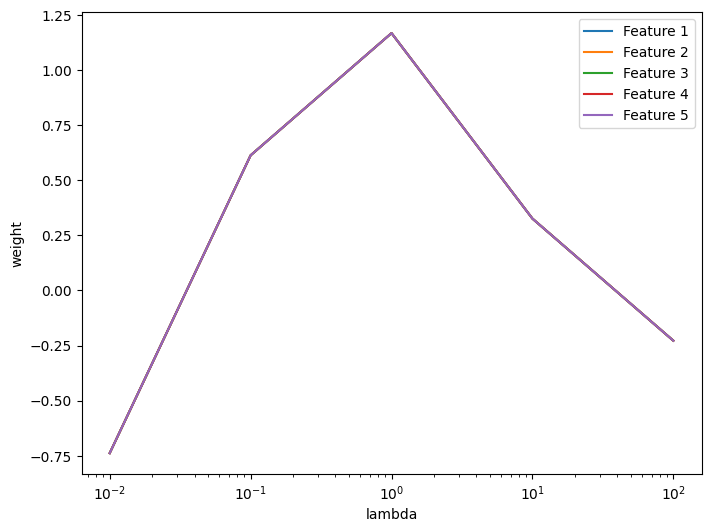

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(5):
    ax.plot(lambdas, weights[i], label=f'Feature {i+1}')
ax.set_xscale('log')
ax.set_xlabel('lambda')
ax.set_ylabel('weight')
ax.legend()
plt.show()